In [1]:
import io
import os
import sys
import csv
import gzip
import time
import json
import secrets
import multiprocessing
import subprocess
import resource
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statsmodels.api as sm
import random
from collections import Counter
import seaborn as sns
import matplotlib.colors as mcolors
import itertools
import collections
sys.path.append('/well/band/users/rbx225/software/lcwgsus/')
# sys.path.append('/Users/sus_zhang/Desktop/Suuuuuuuus/lcwgsus/')
import lcwgsus
from lcwgsus.variables import *

from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import friedmanchisquare
from scipy.stats import studentized_range
pd.options.mode.chained_assignment = None
%cd /gpfs3/well/band/users/rbx225/GAMCC/

# from matplotlib import colormaps
# list(colormaps)

/gpfs3/well/band/users/rbx225/GAMCC


<Figure size 100x100 with 0 Axes>

In [2]:
file = '/well/band/users/rbx225/VAC078/results/wip_vcfs/malariaGen_v1_b38/vanilla/high_info_high_af/lc.chr20.vcf.gz'
vcf = lcwgsus.read_vcf(file)
vcf

,chr,pos,ID,ref,alt,QUAL,FILTER,INFO,FORMAT,0bY-xDB-0ra,...,yAV-3Vb-qIj,YD9-5Es-nqP,YO8-T9b-zon,YOS-BZ6-QHX,ytu-eFR-OcG,yU4-Eut-nCw,Z9X-U4o-ud5,zE9-hn2-M3l,zEt-Cl5-0er,ZWy-PRe-dGC
0,20,79838,.,C,T,.,PASS,EAF=0.00138;INFO_SCORE=1;HWE=1;ERC=0.00072;EAC...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.996,0.004,0:0.004"
1,20,86841,.,A,T,.,PASS,EAF=0.00385;INFO_SCORE=1;HWE=1;ERC=0.00094;EAC...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.994,0.006,0:0.006","0|0:0.959,0.041,0:0.041","0|0:0.998,0.002,0:0.002","0|0:0.997,0.002,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003"
2,20,88026,.,T,G,.,PASS,EAF=0.00341;INFO_SCORE=1;HWE=1;ERC=0.00668;EAC...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.797,0.202,0:0.203","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.995,0.005,0:0.005"
3,20,90144,.,A,G,.,PASS,EAF=0.0455;INFO_SCORE=0.94751;HWE=1;ERC=5.0006...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.995,0.005,0:0.005","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002"
4,20,93078,.,C,A,.,PASS,EAF=0.03193;INFO_SCORE=0.90602;HWE=1;ERC=2.000...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.992,0.008,0:0.008","0|0:0.996,0.004,0:0.004","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.989,0.011,0:0.011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240166,20,64328895,.,A,G,.,PASS,EAF=0.00161;INFO_SCORE=1;HWE=1;ERC=0.00452;EAC...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002"
240167,20,64329042,.,C,T,.,PASS,EAF=0.00245;INFO_SCORE=1;HWE=1;ERC=0.00741;EAC...,GT:GP:DS,"0|0:0.996,0.004,0:0.004",...,"0|0:0.997,0.003,0:0.003","0|0:0.961,0.039,0:0.039","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002"
240168,20,64332285,.,G,T,.,PASS,EAF=0.04503;INFO_SCORE=0.90618;HWE=1;ERC=5.001...,GT:GP:DS,"0|0:0.998,0.002,0:0.002",...,"0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|1:0.001,0.997,0.002:1","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.997,0.003,0:0.003"
240169,20,64332681,.,G,T,.,PASS,EAF=0.00254;INFO_SCORE=1;HWE=1;ERC=0.01534;EAC...,GT:GP:DS,"0|0:0.996,0.004,0:0.004",...,"0|0:0.996,0.004,0:0.004","0|0:0.961,0.039,0:0.039","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.983,0.017,0:0.017","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002"


In [16]:
def extract_gt(s): # Work out diploid dosage from GT
    gts = s.split(':')[0].split('|')
    return sum([int(i) for i in gts])

for c in vcf.columns[9:]: # Extract dosage for each sample
    vcf[c] = vcf[c].apply(extract_gt)

vcf

,chr,pos,ID,ref,alt,QUAL,FILTER,INFO,FORMAT,0bY-xDB-0ra,...,yAV-3Vb-qIj,YD9-5Es-nqP,YO8-T9b-zon,YOS-BZ6-QHX,ytu-eFR-OcG,yU4-Eut-nCw,Z9X-U4o-ud5,zE9-hn2-M3l,zEt-Cl5-0er,ZWy-PRe-dGC
0,20,79838,.,C,T,.,PASS,EAF=0.00138;INFO_SCORE=1;HWE=1;ERC=0.00072;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
1,20,86841,.,A,T,.,PASS,EAF=0.00385;INFO_SCORE=1;HWE=1;ERC=0.00094;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
2,20,88026,.,T,G,.,PASS,EAF=0.00341;INFO_SCORE=1;HWE=1;ERC=0.00668;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
3,20,90144,.,A,G,.,PASS,EAF=0.0455;INFO_SCORE=0.94751;HWE=1;ERC=5.0006...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
4,20,93078,.,C,A,.,PASS,EAF=0.03193;INFO_SCORE=0.90602;HWE=1;ERC=2.000...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240166,20,64328895,.,A,G,.,PASS,EAF=0.00161;INFO_SCORE=1;HWE=1;ERC=0.00452;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
240167,20,64329042,.,C,T,.,PASS,EAF=0.00245;INFO_SCORE=1;HWE=1;ERC=0.00741;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0
240168,20,64332285,.,G,T,.,PASS,EAF=0.04503;INFO_SCORE=0.90618;HWE=1;ERC=5.001...,GT:GP:DS,0,...,0,0,0,0,1,0,0,0,0,0
240169,20,64332681,.,G,T,.,PASS,EAF=0.00254;INFO_SCORE=1;HWE=1;ERC=0.01534;EAC...,GT:GP:DS,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
king

,FID1,ID1,FID2,ID2,N_SNP,HetHet,IBS0,Kinship,concordance
0,0bY-xDB-0ra,0bY-xDB-0ra,9o0-jzX-dc5,9o0-jzX-dc5,240171,0.2042,0.0000,0.4920,0.993417
1,1l9-C4B-1EI,1l9-C4B-1EI,2b9-DAy-N49,2b9-DAy-N49,240171,0.2057,0.0000,0.4857,0.988013
2,1l9-C4B-1EI,1l9-C4B-1EI,Deo-mbB-uyg,Deo-mbB-uyg,240171,0.2061,0.0000,0.4868,0.988945
3,2b9-DAy-N49,2b9-DAy-N49,Deo-mbB-uyg,Deo-mbB-uyg,240171,0.2058,0.0000,0.4866,0.988708
4,2Jy-dVn-Sfj,2Jy-dVn-Sfj,4rH-ZRE-5Dv,4rH-ZRE-5Dv,240171,0.1874,0.0000,0.4862,0.989449
...,...,...,...,...,...,...,...,...,...
194,vJR-Cfn-ebY,vJR-Cfn-ebY,YOS-BZ6-QHX,YOS-BZ6-QHX,240171,0.1891,0.0000,0.4886,0.991219
195,vo6-KUX-6hn,vo6-KUX-6hn,yAV-3Vb-qIj,yAV-3Vb-qIj,240171,0.1992,0.0001,0.4737,0.978195
196,Y5x-5e6-TtH,Y5x-5e6-TtH,YD9-5Es-nqP,YD9-5Es-nqP,240171,0.2045,0.0000,0.4928,0.994050
197,Qyg-Ktf-dSl,Qyg-Ktf-dSl,Z9X-U4o-ud5,Z9X-U4o-ud5,240171,0.2055,0.0000,0.4905,0.992097


Text(0, 0.5, '# pair of replicates')

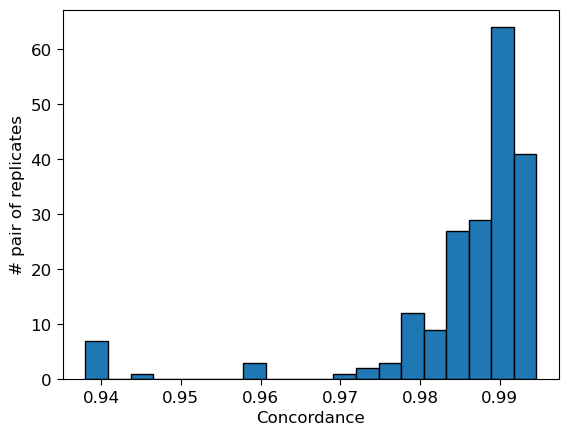

In [27]:
king = pd.read_csv('/well/band/users/rbx225/VAC078/results/king/king20.kin0', sep = '\t')
king = king[king['Kinship'] >= 0.354].reset_index(drop = True)  # Keep replicates

king['concordance'] = 0

def check_gt_concordant(r):
    s1 = r['FID1']
    s2 = r['FID2']
    r['concordance'] = sum(vcf[s1] == vcf[s2])/len(vcf)
    return r

king = king.apply(check_gt_concordant, axis = 1)
plt.hist(king['concordance'], ec = 'black', bins = 20)
plt.xlabel('Concordance')
plt.ylabel('# pair of replicates')

In [ ]:
# def check_gt_concordant(r):
#     s1 = r['FID1']
#     s2 = r['FID2']
#     s1 = vcf[s1].str.split(':').str.get(0).str.split('|').apply(lambda x: sum([int(i) for i in x]))
#     s2 = vcf[s2].str.split(':').str.get(0).str.split('|').apply(lambda x: sum([int(i) for i in x]))
#     r['concordance'] = len(vcf[s1 == s2])/len(vcf)
#     return r